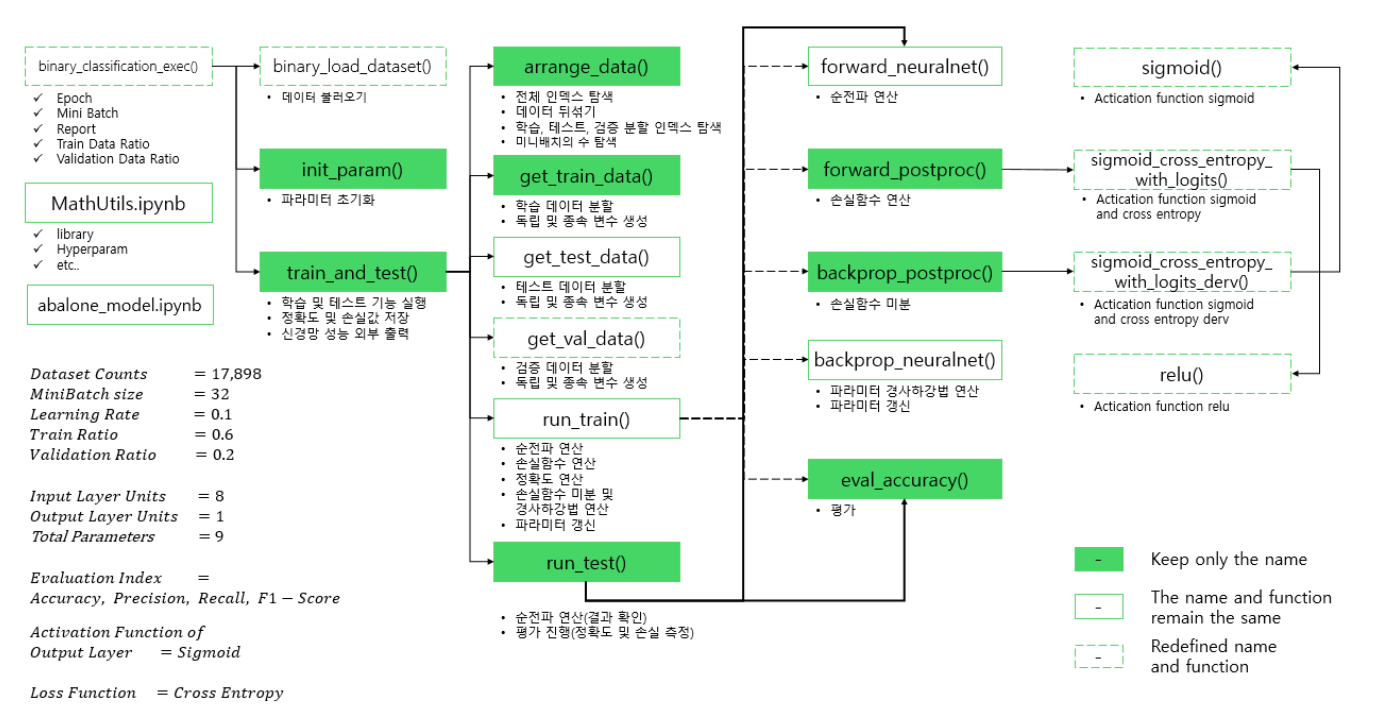

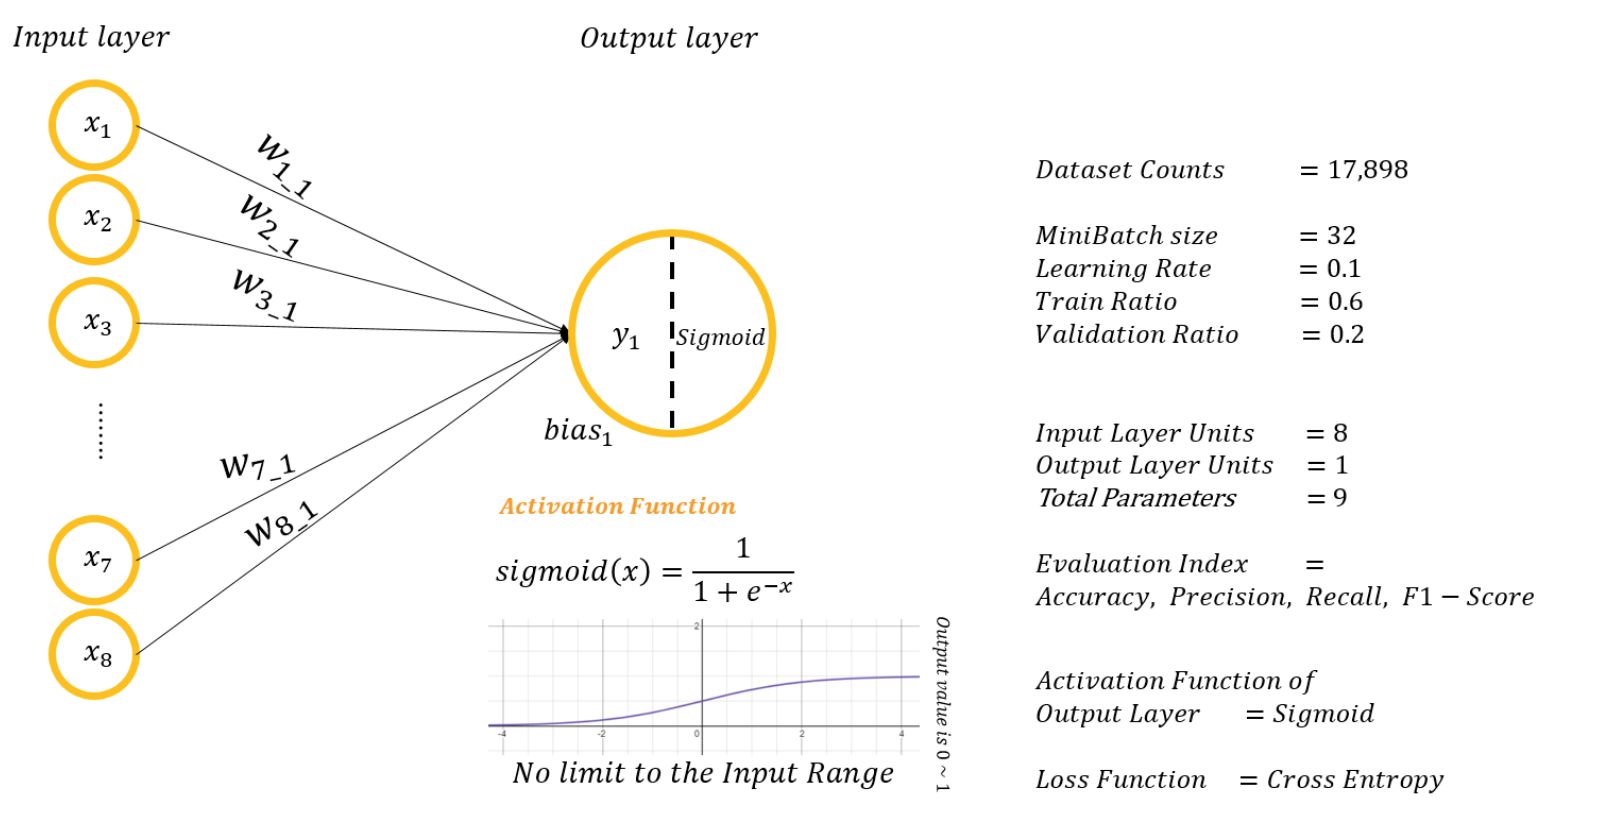

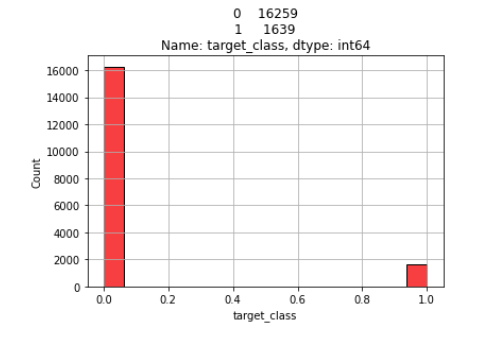

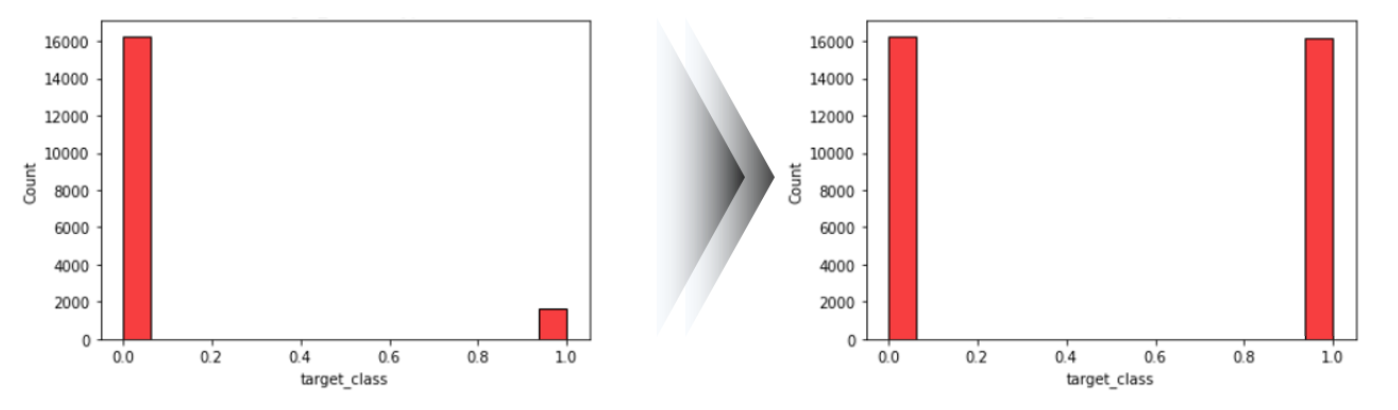

# 첫 번째 출력

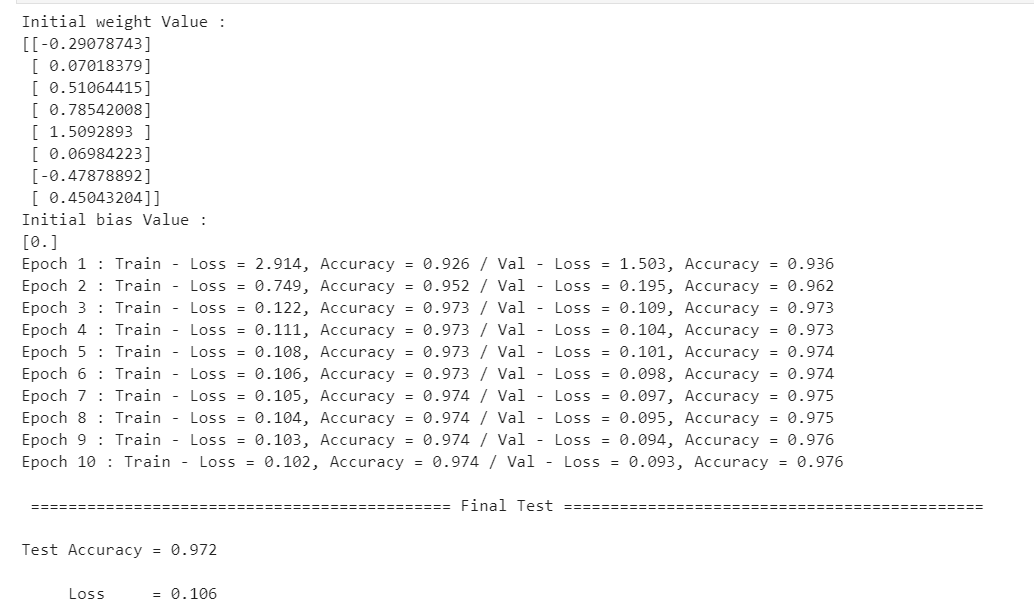

# 두 번째 출력

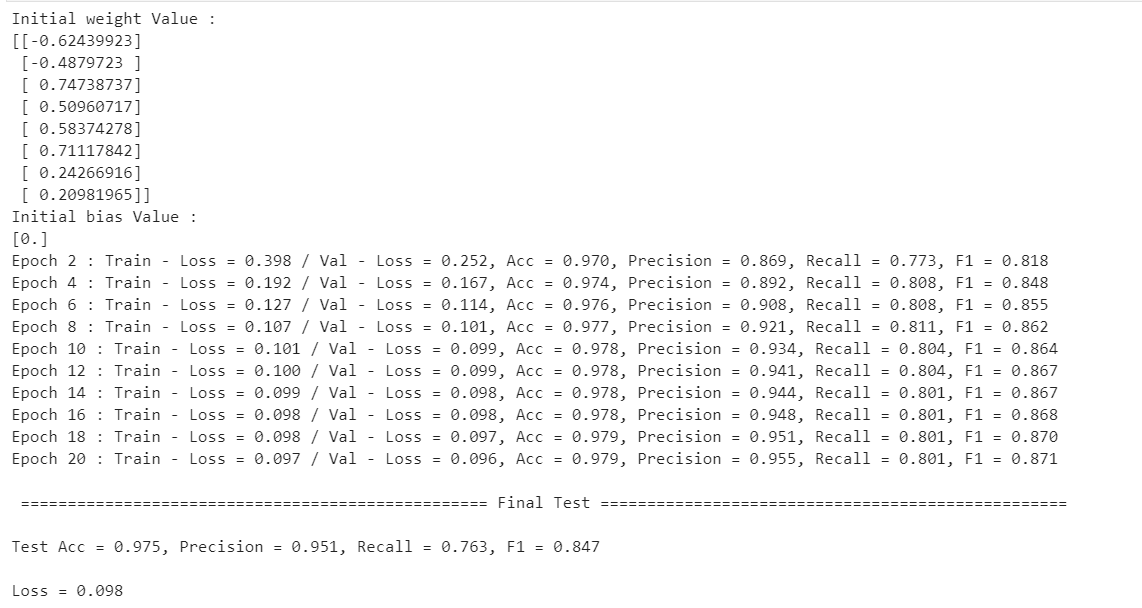

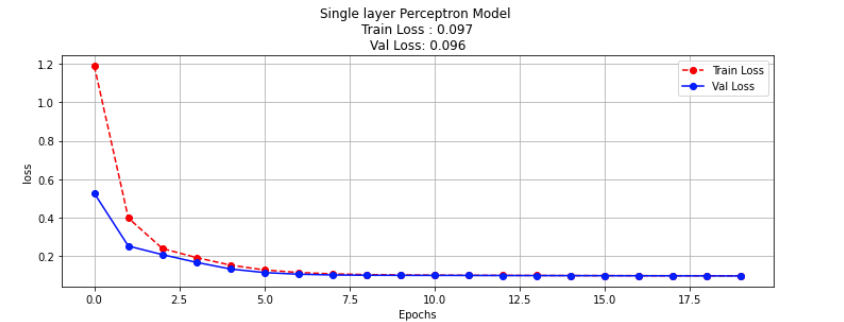

In [1]:
%run /content/MathUtils.ipynb

In [2]:
%run /content/abalone_model.ipynb

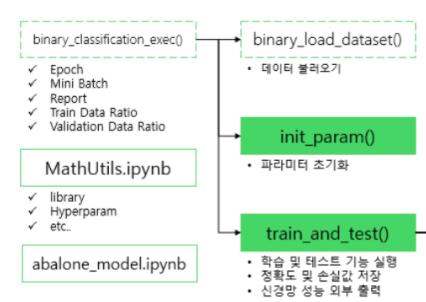

In [3]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2):
    binary_load_dataset()
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio)

    return train_metrics_mean_row, val_metrics_row, test_metrics

In [4]:
def binary_load_dataset():
    # 실험을 진행하기 위해서 사용되어지는 원본 데이터 
    with open('/content/pulsar_stars.csv') as csvfile:
    #with open('/content/pulsar_stars_mini.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        rows = []
        for row in csvreader:
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 8, 1
    
    data = np.asarray(rows, dtype = 'float32')

In [5]:
binary_load_dataset()

In [ ]:
print("data.shape :", data.shape)

data.shape : (17898, 9)


In [6]:
def init_param():
    global weight, bias 

    # 기능 축소 
#    weight_initial = []
#    bias_initial   = []

    # input_cnt = 8 , output_cnt = 1
    weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
    bias   = np.zeros([output_cnt])
    print("Initial Weight Value : \n{}".format(weight))
    print("Initial Bias Value : \n{}".format(bias))

#    weight_initial.append(weight)
#    bias_initial.append(bias)

#    return weight_initial, bias_initial

In [8]:
init_param()

Initial Weight Value : 
[[-0.30786079]
 [ 0.18833471]
 [ 0.28120912]
 [-0.38132123]
 [ 1.32775801]
 [ 0.02206388]
 [ 1.73394467]
 [ 1.58867378]]
Initial Bias Value : 
[0.]


In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):
    pass

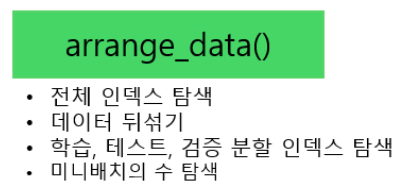

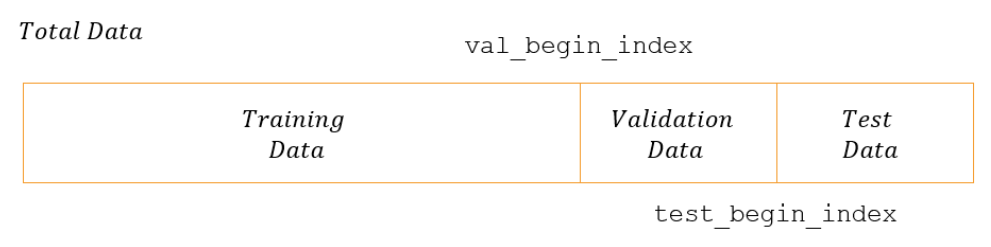

In [7]:
def arrange_data(mb_size, train_ratio, val_ratio):
    
    global shuffle_map, test_begin_index, val_begin_index

    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)

    mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size

    val_begin_index  = mini_batch_step_count * mb_size
    test_begin_index = int(val_begin_index + (val_ratio * data.shape[0])) 


    return mini_batch_step_count

In [9]:
mini_batch_step_count = arrange_data(mb_size=1, train_ratio=0.6, val_ratio=0.2)

# mini dataset의 행은 10개 입니다. 

In [10]:
print("mini_batch_step_count : ", mini_batch_step_count)
print("val_begin_index       : ", val_begin_index)
print("test_begin_index      : ", test_begin_index)

mini_batch_step_count :  10738
val_begin_index       :  10738
test_begin_index      :  14317


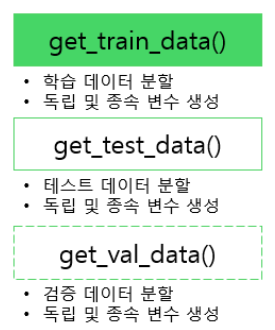

In [11]:
def get_train_data(mb_size, n):
    # 기능 축소 
    #if n == 0:
    #    np.random.shuffle(shuffle_map[:test_begin_index])
    
    # n 값은 미니배치의 수  
    from_idx = mb_size * n
    to_idx   = mb_size * (n+1)

    train_data = data[shuffle_map[from_idx : to_idx ]]

    return train_data[ : , : -output_cnt], train_data[ : , -output_cnt : ]

def get_test_data():
    test_data = data[shuffle_map[test_begin_index:]]
    return test_data[ : , : -output_cnt], test_data[ : , -output_cnt : ]

def get_val_data():
    val_data = data[shuffle_map[ val_begin_index : test_begin_index ]]
    return val_data[ : , : -output_cnt], val_data[ : , -output_cnt : ]

In [12]:
train_x, train_y = get_train_data(mb_size = 6, n = 0)
val_x, val_y     = get_val_data()
test_x, test_y   = get_test_data()

In [13]:
print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(6, 8) (6, 1)
(3579, 8) (3579, 1)
(3581, 8) (3581, 1)


In [ ]:
def run_train(x, y):
    loss     = 0
    accuracy = 100

    return loss, accuracy

def run_test(x, y):
    loss = 0 
    accuracy = 100

    return loss, accuracy  

In [14]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):
    mini_batch_step_count = arrange_data(mb_size, train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x, val_y   = get_val_data()

    val_loss_row, val_acc_row      = [], []
    losses_mean_row, accs_mean_row = [], []

    # 에폭에 따른 반복문 
    for epoch in range(epoch_count):
        
        losses, accs = [], []

        # 배치에 따른 반복문 
        for n in range(mini_batch_step_count):

            train_x, train_y = get_train_data(mb_size, n)
            # 학습 데이터로 하는 학습 
            loss, acc        = run_train(train_x, train_y)

            losses.append(loss)
            accs.append(acc)

        # 검증 데이터로 하는 검증 
        val_loss, val_acc = run_test(val_x, val_y)

        val_loss_row.append(val_loss)
        val_acc_row.append(val_acc)

        if report > 0 and (epoch + 1) % report == 0:
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f} / Val - Loss = {:.3f}, Accuracy = {:.3f}".\
                  format(epoch + 1, np.mean(losses), np.mean(accs), val_loss, val_acc))
        
        losses_mean = np.mean(losses)
        accs_mean   = np.mean(accs)

        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)
    
    # 테스트 데이터를 가지고 하는 테스트 
    test_loss, test_acc = run_test(test_x, test_y)

    print("\n", "=" * 40, "Final_Test", "=" * 40)
    print("\nTest Accuracy = {:.3f}".format(test_acc))
    print("\nTest Loss     = {:.3f}".format(test_loss))

    return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss, test_acc]

In [ ]:
train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count = 10, 
                                                                       mb_size     = 1, 
                                                                       report      = 1, 
                                                                       train_ratio = 0.6, 
                                                                       val_ratio   = 0.2)

Epoch 1 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 2 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 3 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 4 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 5 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 6 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 7 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 8 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 9 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000
Epoch 10 : Train - Loss = 0.000, Accuracy = 100.000 / Val - Loss = 0.000, Accuracy = 100.000

 ======================================== Final_Test =========================

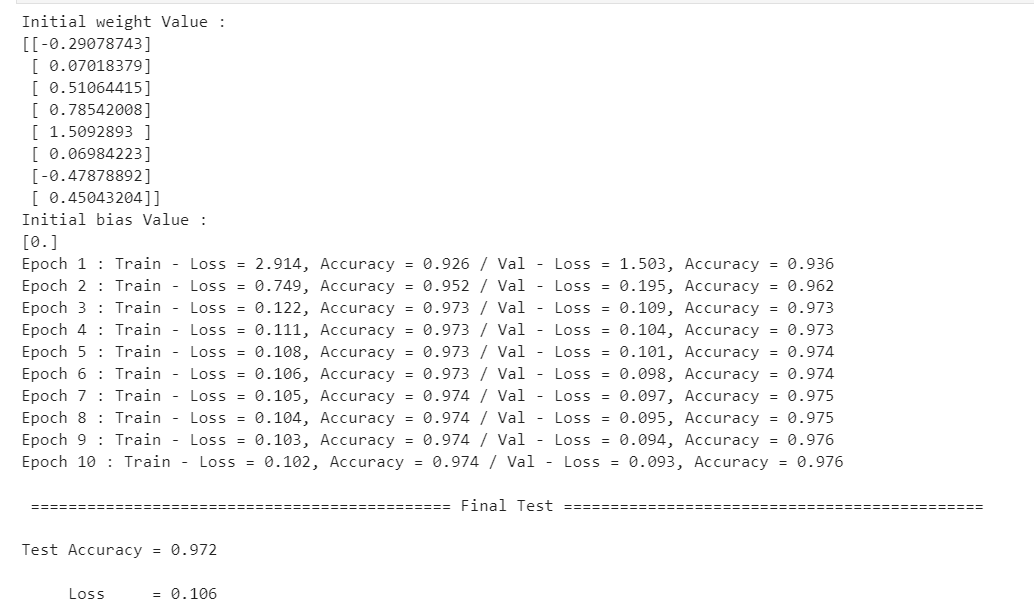

# 연산 부분 ~ 

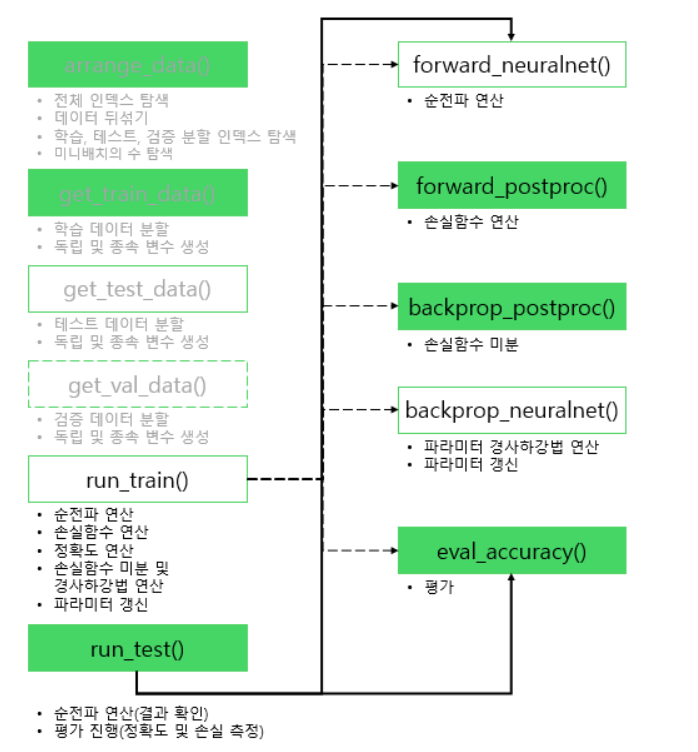

In [15]:
def forward_neuralnet(x):
    y_hat = np.matmul(x, weight) + bias
    return y_hat, x

In [16]:
y_hat, _ = forward_neuralnet(train_x)
print("y_hat : \n ", y_hat)

y_hat : 
  [[ 70.6686956 ]
 [114.17668206]
 [  6.67746487]
 [108.89028494]
 [ 37.69646629]
 [ 89.54288986]]


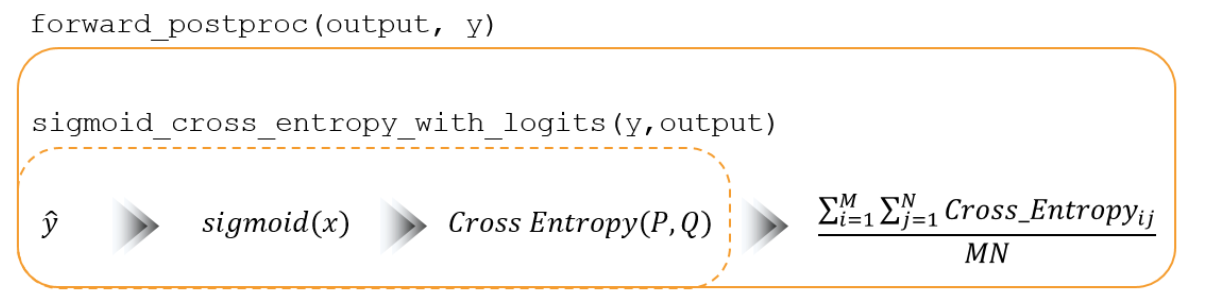

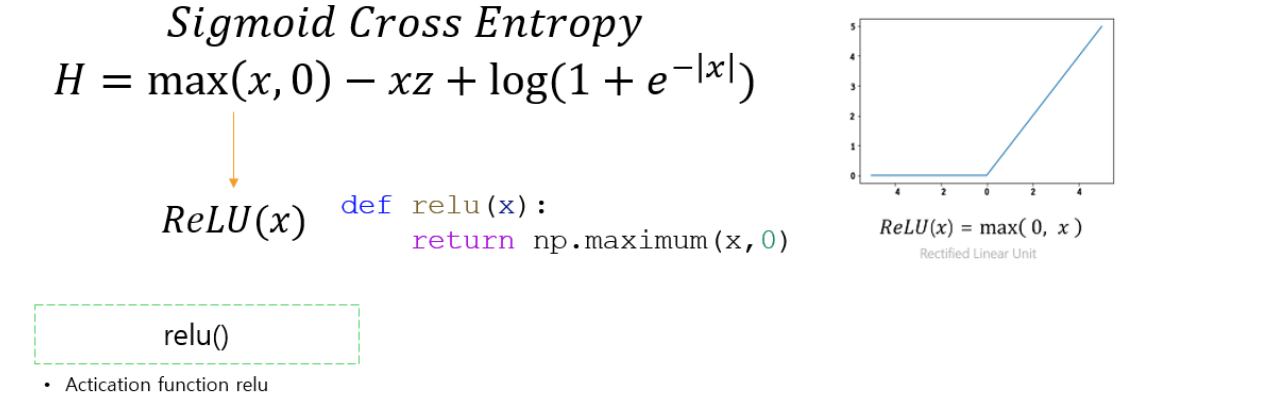

In [17]:
def relu(x):
    return np.maximum(x, 0)

In [ ]:
x_list = [-15, -10 , 0, 15, 20]

for x in x_list:
    print(relu(x))

0
0
0
15
20


In [18]:
# z 값 실제 y값, x값은 신경망의 예측값
def sigmoid_cross_entropy_with_logits(z, x):
    
    return relu(x) - x * z + np.log(1+np.exp(-np.abs(x)))

In [ ]:
loss = sigmoid_cross_entropy_with_logits(train_y, y_hat)
print("loss : \n", loss)

loss : 
 [[5.51044113e+00]
 [3.26446683e-03]
 [6.01878707e+00]
 [5.15843423e-04]
 [6.46495422e+00]
 [5.01788761e+00]]


In [ ]:
loss.shape

(6, 1)

In [ ]:
train_y

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_hat

array([[5.5063886 ],
       [5.72302615],
       [6.01635149],
       [7.56944935],
       [6.46339595],
       [5.01124712]])

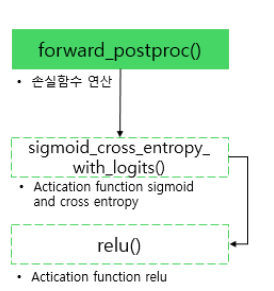

In [19]:
def forward_postproc(output, y):
    CEE  = sigmoid_cross_entropy_with_logits(y, output)
    loss = np.mean(CEE)

    return loss, [y, output, CEE]

In [ ]:
loss, _ = forward_postproc(y_hat, train_y)
print("loss : ", loss)

loss :  3.8359750568867477


# 역전파 과정

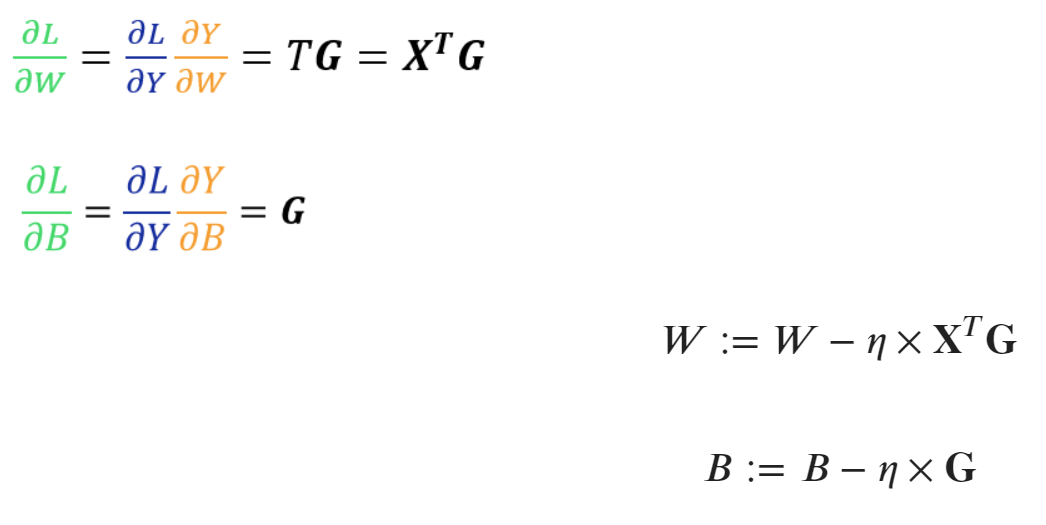

In [20]:
def backprop_neuralnet(G_output, x):
    global weight, bias 

    x_transpose = x.transpose()
    G_w = np.matmul(x_transpose, G_output)
    
    G_b = np.sum(G_output, axis = 0)

    weight -= LEARNING_RATE * G_w
    bias   -= LEARNING_RATE * G_b

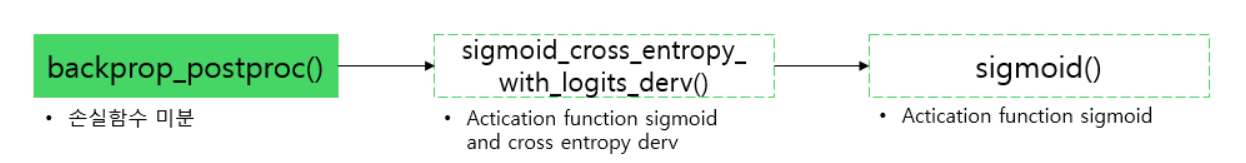

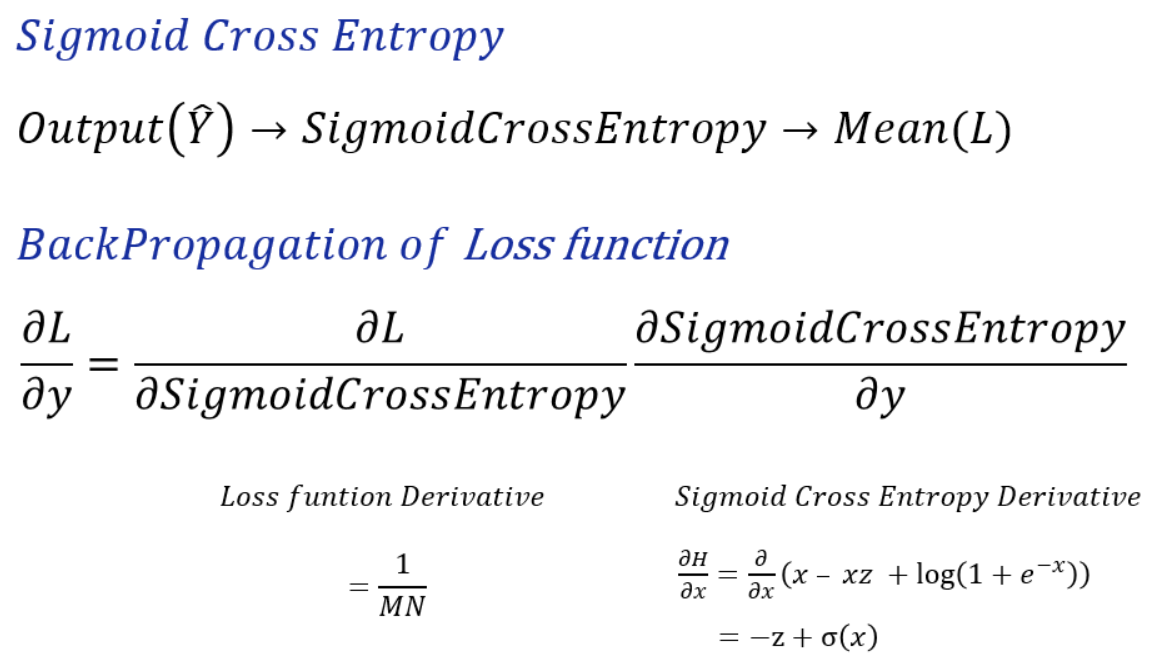

In [21]:
def sigmoid_cross_entropy_with_logits_derv(z, x):
    return -z + sigmoid(x)

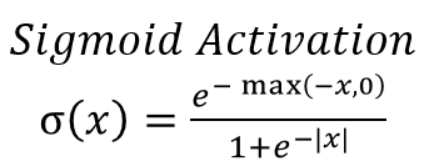

In [22]:
def sigmoid(x):
    return np.exp(-relu(-x)) / (1.0 + np.exp(-np.abs(x)))

In [ ]:
sigmoid(y_hat)

array([[0.99595568],
       [0.99674086],
       [0.99756738],
       [0.99948429],
       [0.99844294],
       [0.99338151]])

In [ ]:
result = sigmoid_cross_entropy_with_logits_derv(train_y, y_hat)
print("result : \n", result)

result : 
 [[ 9.95955677e-01]
 [-3.25914425e-03]
 [ 9.97567382e-01]
 [-5.15710399e-04]
 [ 9.98442937e-01]
 [ 9.93381507e-01]]


In [24]:
def backprop_postproc(aux_pp_y_output_CEE):

    y, output, CEE = aux_pp_y_output_CEE

    g_loss_entropy   = 1.0 / np.prod(CEE.shape)
    g_entropy_output = sigmoid_cross_entropy_with_logits_derv(y, output)

    G_output = g_entropy_output * g_loss_entropy 

    return G_output


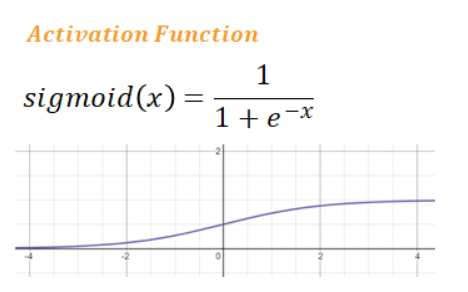

In [25]:
output_list = [-10, -5, 0, 6, 12]

for output in output_list:
    result = sigmoid(output)
    print(np.round(result))

0.0
0.0
0.0
1.0
1.0


In [26]:
output_list = [-10, -5, 0, 6, 12]

for output in output_list:
    print(np.greater(output,0))

False
False
False
True
True


In [27]:
def eval_accuracy(output, y):
    estimate = np.greater(output, 0)

    answer   = np.greater(y, 0.5)

    correct = np.equal(estimate, answer)

    return np.mean(correct)

In [ ]:
acc = eval_accuracy(y_hat, train_y)
print("ACC : {:.3f}% ".format(acc * 100))

ACC : 33.333% 


In [ ]:
print(y_hat)
print("------")
print(train_y)

[[5.5063886 ]
 [5.72302615]
 [6.01635149]
 [7.56944935]
 [6.46339595]
 [5.01124712]]
------
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [ ]:
estimate = np.greater(y_hat, 0)
print(estimate)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [ ]:
answer   = np.greater(train_y, 0.5)
print(answer)

[[False]
 [ True]
 [False]
 [ True]
 [False]
 [False]]


In [ ]:
correct = np.equal(estimate, answer)
print(correct)

[[False]
 [ True]
 [False]
 [ True]
 [False]
 [False]]


In [ ]:
np.mean(correct)

0.3333333333333333

In [59]:
def run_train(x, y):
    y_hat, aux_nn_x           = forward_neuralnet(x)
    loss, aux_pp_y_output_CEE = forward_postproc(y_hat, y)

    accuracy = eval_accuracy_sk(y_hat, y)

    G_output = backprop_postproc(aux_pp_y_output_CEE)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [60]:
def run_test(x, y):
    y_hat, _ = forward_neuralnet(x)
    loss, _  = forward_postproc(y_hat, y)
    accuracy = eval_accuracy_sk(y_hat, y)

    return loss, accuracy

In [31]:
%run /content/MathUtils.ipynb

In [32]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size     = 32, 
                                                                                   report      = 1, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio   = 0.2)

Initial Weight Value : 
[[-1.10289659]
 [ 0.32390027]
 [-1.0587012 ]
 [-0.31570845]
 [ 2.44663974]
 [-0.14413924]
 [-1.22453842]
 [-0.47599678]]
Initial Bias Value : 
[0.]
Epoch 1 : Train - Loss = 6.299, Accuracy = 0.921 / Val - Loss = 4.791, Accuracy = 0.922
Epoch 2 : Train - Loss = 3.356, Accuracy = 0.926 / Val - Loss = 2.399, Accuracy = 0.930
Epoch 3 : Train - Loss = 1.363, Accuracy = 0.935 / Val - Loss = 0.621, Accuracy = 0.947
Epoch 4 : Train - Loss = 0.345, Accuracy = 0.954 / Val - Loss = 0.302, Accuracy = 0.956
Epoch 5 : Train - Loss = 0.266, Accuracy = 0.956 / Val - Loss = 0.278, Accuracy = 0.958
Epoch 6 : Train - Loss = 0.244, Accuracy = 0.958 / Val - Loss = 0.257, Accuracy = 0.960
Epoch 7 : Train - Loss = 0.226, Accuracy = 0.961 / Val - Loss = 0.238, Accuracy = 0.960
Epoch 8 : Train - Loss = 0.210, Accuracy = 0.961 / Val - Loss = 0.224, Accuracy = 0.961
Epoch 9 : Train - Loss = 0.194, Accuracy = 0.962 / Val - Loss = 0.210, Accuracy = 0.961
Epoch 10 : Train - Loss = 0.181, Acc

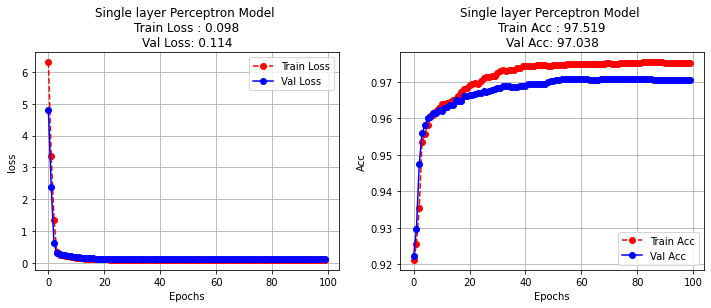

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(train_metrics_mean_row[1], '--o', color = 'red', label = 'Train Acc')
plt.plot(val_metrics_row[1], '-o', color = 'blue', label = 'Val Acc')

plt.title('Single layer Perceptron Model \nTrain Acc : {:.3f}\nVal Acc: {:.3f}'.format(train_metrics_mean_row[1][-1] * 100 , val_metrics_row[1][-1] * 100))
plt.xlabel('Epochs')
plt.ylabel('Acc')
#plt.ylim(0.9,1)
plt.grid()
plt.legend()

plt.show()

In [ ]:
new_x = [44.796875, 
         30.17303209, 
         4.735203756, 
         27.96010082, 
         30.69314381, 
         61.82819804, 
         2.156630767, 
         3.773395708]

In [ ]:
pred_Y, _ = forward_neuralnet(new_x)
pred_Y_sigmoid = sigmoid(pred_Y)

print(pred_Y_sigmoid)

[1.]


In [ ]:
print(weight)
print("=========")
print(bias)

[[-0.35540732]
 [ 0.40531543]
 [-0.22990096]
 [ 3.06300891]
 [-0.11674381]
 [ 0.00382669]
 [ 0.3823408 ]
 [-0.06197325]]
[-0.06241796]


# 데이터 증폭(오버 샘플링) / 평가지표 수정(sk or numpy)

In [34]:
def binary_classification_exec(epoch_count = 10, mb_size = 10, report = 1, train_ratio = 0.6, val_ratio = 0.2, adjust_ratio = False):
    binary_load_dataset(adjust_ratio)
    init_param()
    train_metrics_mean_row, val_metrics_row, test_metrics = train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio)

    return train_metrics_mean_row, val_metrics_row, test_metrics

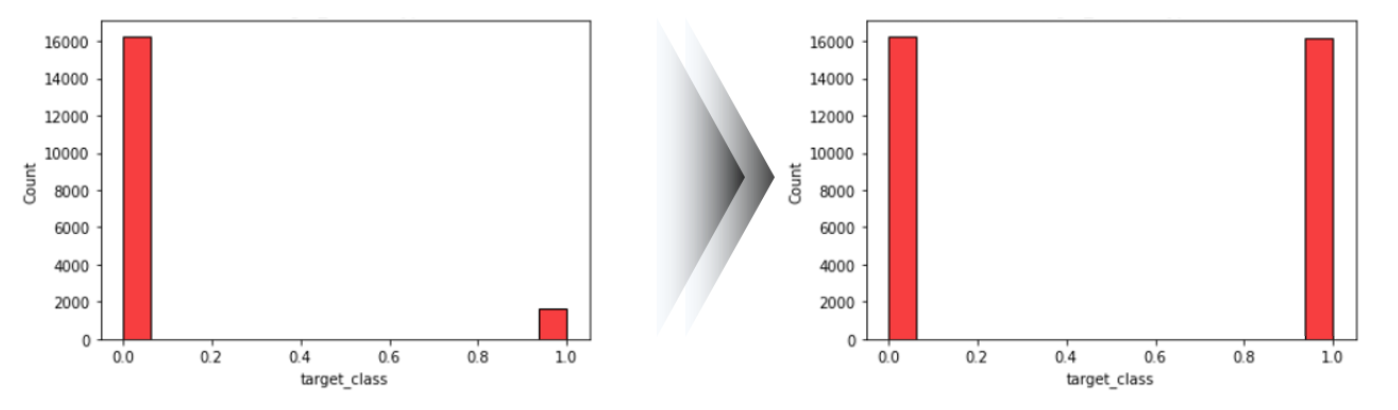

In [38]:
def binary_load_dataset(adjust_ratio):

    pulsars, stars = [], []

    with open('/content/pulsar_stars.csv') as csvfile:

        csvreader = csv.reader(csvfile)
        next(csvreader)

        for row in csvreader:
            if row[8] == '1' : pulsars.append(row)

            else:
                stars.append(row)

    global data, input_cnt, output_cnt
    input_cnt, output_cnt = 8, 1

    star_cnt, pulsar_cnt = len(stars), len(pulsars)

    # 증폭 과정 수행 
    if adjust_ratio:
        data = np.zeros([ star_cnt * 2 , 9])
        data[0 : star_cnt, : ] = np.asarray(stars, dtype='float32')
        
        for n in range(star_cnt):
            data[star_cnt + n] = np.asarray(pulsars[n % pulsar_cnt], dtype='float32')

    # 증폭 과정 수행 X
    else:
        data = np.zeros([ star_cnt + pulsar_cnt ,  9])
        data[0 : star_cnt, : ] = np.asarray(stars, dtype='float32')
        data[star_cnt : , :  ] = np.asarray(pulsars, dtype='float32')

In [37]:
pulsars = ['a', 'b', 'c', 'd']
star_cnt = 10
pulsars_cnt = len(pulsars)


for n in range(star_cnt):
    print("n                        :", n)
    print("pulsars_cnt              :", pulsars_cnt)
    print("n % pulsars_cnt          :", n % pulsars_cnt)
    print("pulsars[n % pulsars_cnt] :", pulsars[n % pulsars_cnt])
    print("===========================")

n                        : 0
pulsars_cnt              : 4
n % pulsars_cnt          : 0
pulsars[n % pulsars_cnt] : a
n                        : 1
pulsars_cnt              : 4
n % pulsars_cnt          : 1
pulsars[n % pulsars_cnt] : b
n                        : 2
pulsars_cnt              : 4
n % pulsars_cnt          : 2
pulsars[n % pulsars_cnt] : c
n                        : 3
pulsars_cnt              : 4
n % pulsars_cnt          : 3
pulsars[n % pulsars_cnt] : d
n                        : 4
pulsars_cnt              : 4
n % pulsars_cnt          : 0
pulsars[n % pulsars_cnt] : a
n                        : 5
pulsars_cnt              : 4
n % pulsars_cnt          : 1
pulsars[n % pulsars_cnt] : b
n                        : 6
pulsars_cnt              : 4
n % pulsars_cnt          : 2
pulsars[n % pulsars_cnt] : c
n                        : 7
pulsars_cnt              : 4
n % pulsars_cnt          : 3
pulsars[n % pulsars_cnt] : d
n                        : 8
pulsars_cnt              : 4
n % pulsars_cn

In [ ]:
pulsars[0]
pulsars[1]
pulsars[2]
pulsars[3]
pulsars[0]
pulsars[1]
pulsars[2]
pulsars[3]
pulsars[0]
....


In [39]:
binary_load_dataset(adjust_ratio=True)
print("adjust_ratio=True : ", data.shape)
binary_load_dataset(adjust_ratio=False)
print("adjust_ratio=False : ", data.shape)

adjust_ratio=True :  (32518, 9)
adjust_ratio=False :  (17898, 9)


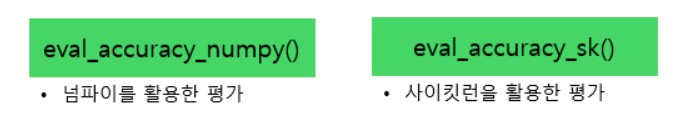

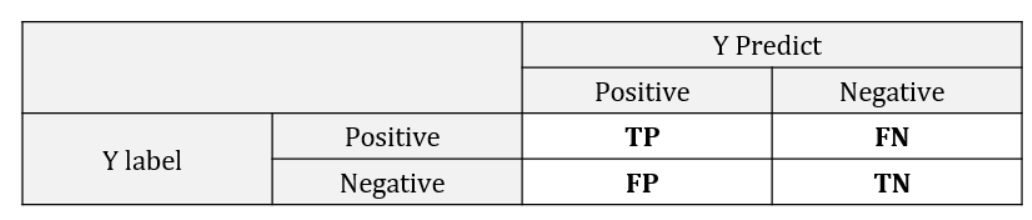

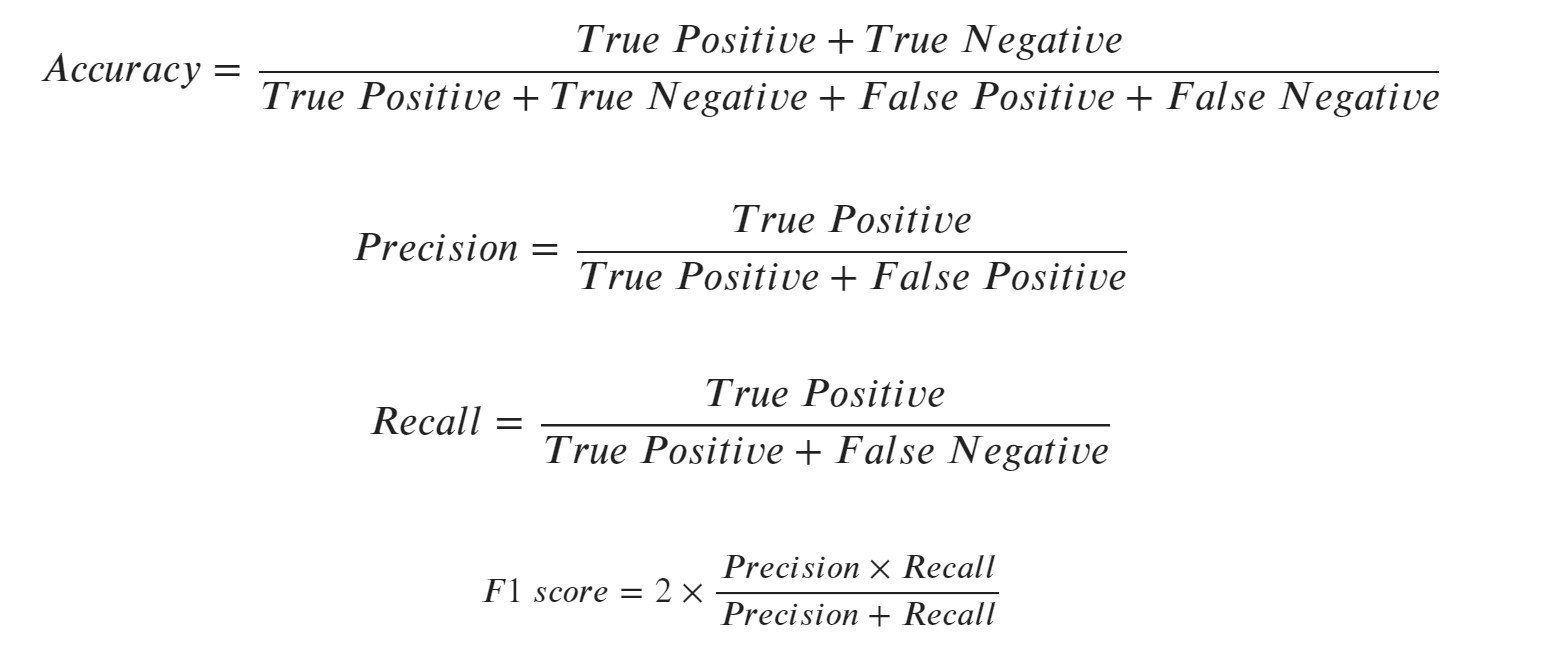

In [42]:
%run /content/MathUtils.ipynb 

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score

In [43]:
def eval_accuracy_sk(output, y):
    pred_Y = np.greater(output, 0)
    real_Y = np.greater(y, 0.5)

    accuracy  = accuracy_score(real_Y, pred_Y)
    precision = precision_score(real_Y, pred_Y)
    recall    = recall_score(real_Y, pred_Y)
    f1        = f1_score(real_Y, pred_Y)

    return [accuracy, precision, recall, f1]

In [46]:
metrics = eval_accuracy_sk(y_hat, train_y)
print(metrics)

[0.0, 0.0, 0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
metrics = eval_accuracy_numpy(y_hat, train_y)
print(metrics)

[0.0, 0.0, 0.0, 0.0]


In [45]:
train_y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [47]:
def eval_accuracy_numpy(output,y):

    # 예측값을 0과 비교하여 줍니다. 
    # 예측값을 0과 비교하는 이유는 시그모이드 활성화 함수의 특징인데, 
    # 입력값이 음수인 경우는 출력값이 0.5 보다 작으니 0으로, 
    # 입력값이 양수인 경우는 출력값이 0.5 보다 크니 1로 판단할 수 있습니다.

    est_yes = np.greater(output,0)
    ans_yes = np.greater(y, 0.5)

    est_no = np.logical_not(est_yes) 
    ans_no = np.logical_not(ans_yes)


    # 마찬가지로 평가에 사용된 결과를 모두 더해 
    # 각각의 혼동행렬을 만들어 줍니다.  
    tp = np.sum(np.logical_and(est_yes, ans_yes))
    tn = np.sum(np.logical_and(est_no, ans_no))
    fp = np.sum(np.logical_and(ans_no, est_yes))
    fn = np.sum(np.logical_and(ans_yes, est_no))

    # 다음은 정확도 측정 지표를 만들어 줍니다. 
    # 이때 나눗셈의 경우 0으로 나눠지는 경우가 
    # 발생할 수 있기에, 
    # 이 점을 고려하여 안전한 나눗셈 함수를 만들어 주겠습니다. 
    accuracy = safe_div(tp+tn,tp+fp+fn+tn)
    precision = safe_div(tp,tp+fp)
    recall = safe_div(tp,tp+fn)
    f1 = 2 * safe_div(recall*precision,recall+precision)
    
    return [accuracy, precision, recall, f1]

In [51]:
0 / 0

ZeroDivisionError: ignored

In [52]:
def safe_div(p, q):
    p, q = float(p), float(q)
    if np.abs(q) < 1.0e-20:
        return np.sign(p)
    return p / q

In [53]:
safe_div(100, 0)

1.0

In [54]:
safe_div(-100, 0)

-1.0

In [55]:
safe_div(0, 0)

0.0

In [66]:
def run_test(x, y):
    y_hat, _ = forward_neuralnet(x)
    loss, _  = forward_postproc(y_hat, y)
    accuracy = eval_accuracy_numpy(y_hat, y)

    return loss, accuracy

In [67]:
def run_train(x, y):
    y_hat, aux_nn_x           = forward_neuralnet(x)
    loss, aux_pp_y_output_CEE = forward_postproc(y_hat, y)

    accuracy = eval_accuracy_numpy(y_hat, y)

    G_output = backprop_postproc(aux_pp_y_output_CEE)
    backprop_neuralnet(G_output, aux_nn_x)

    return loss, accuracy

In [68]:
def train_and_test(epoch_count, mb_size, report, train_ratio, val_ratio):

    mini_batch_step_count = arrange_data(mb_size,train_ratio, val_ratio)

    test_x, test_y = get_test_data()
    val_x,  val_y  = get_val_data()

    losses_mean_row = []
    val_loss_row    = []

    #losses_mean_row, accs_mean_row = [], []
    #val_loss_row, val_acc_row      = [], []
    
    for epoch in range(epoch_count):

        losses = []
        #accs = []

        for n in range(mini_batch_step_count):
            train_x, train_y  = get_train_data(mb_size, n)
           
            loss, _           = run_train(train_x,train_y)
               
            losses.append(loss)
            #accs.append(acc)

        val_loss, val_acc = run_test(val_x, val_y)
        val_loss_row.append(val_loss)
        #val_acc_row.append(val_acc)  

        if report > 0 and (epoch+1) % report == 0:
            
            print("Epoch {} : Train - Loss = {:.3f} / Val - Loss = {:.3f}, Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}".\
                  format(epoch+1, np.mean(losses), val_loss, val_acc[0], val_acc[1], val_acc[2], val_acc[3]))
            
        losses_mean = np.mean(losses) 
        #accs_mean = np.mean(accs)

        losses_mean_row.append(losses_mean)  
        #accs_mean_row.append(accs_mean)   



    test_loss, test_acc = run_test(test_x, test_y)
    
    print("\n","=" * 50, 'Final Test', '=' * 50)
    print('\nTest Acc = {:.3f}, Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3F}'.\
          format(test_acc[0], test_acc[1], test_acc[2], test_acc[3]))
    print('\nLoss = {:.3f}'.format(test_loss))

    #return [losses_mean_row, accs_mean_row], [val_loss_row, val_acc_row], [test_loss , test_acc]
    return [losses_mean_row], [val_loss_row], [test_loss , test_acc]

In [ ]:
metrics = train_and_test(epoch_count=5, mb_size=32, report=1,train_ratio=0.6, val_ratio=0.2)
metrics

In [65]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size     = 32, 
                                                                                   report      = 10, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio   = 0.2,
                                                                                   adjust_ratio = False)

Initial Weight Value : 
[[-0.39743643]
 [ 0.60609453]
 [ 1.47536245]
 [-0.46653184]
 [-0.53121708]
 [-0.40378269]
 [ 0.09914394]
 [ 0.36633034]]
Initial Bias Value : 
[0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Epoch 10 : Train - Loss = 0.108 / Val - Loss = 0.114, Acc = 0.970, Precision = 0.907, Recall = 0.786, F1 = 0.842
Epoch 20 : Train - Loss = 0.091 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.916, Recall = 0.814, F1 = 0.862
Epoch 30 : Train - Loss = 0.090 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.916, Recall = 0.814, F1 = 0.862
Epoch 40 : Train - Loss = 0.090 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.916, Recall = 0.814, F1 = 0.862
Epoch 50 : Train - Loss = 0.090 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.913, Recall = 0.817, F1 = 0.862
Epoch 60 : Train - Loss = 0.090 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.913, Recall = 0.819, F1 = 0.864
Epoch 70 : Train - Loss = 0.090 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.913, Recall = 0.819, F1 = 0.864
Epoch 80 : Train - Loss = 0.089 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.913, Recall = 0.819, F1 = 0.864
Epoch 90 : Train - Loss = 0.089 / Val - Loss = 0.098, Acc = 0.974, Precision = 0.913, Recall = 0

In [72]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size     = 32, 
                                                                                   report      = 10, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio   = 0.2,
                                                                                   adjust_ratio = False)

Initial Weight Value : 
[[-1.88508184]
 [ 0.2998713 ]
 [ 0.26431314]
 [-0.66999125]
 [-0.39813922]
 [-1.14536848]
 [ 0.02547497]
 [ 0.2213313 ]]
Initial Bias Value : 
[0.]
Epoch 10 : Train - Loss = 0.179 / Val - Loss = 0.205, Acc = 0.958, Precision = 0.789, Recall = 0.810, F1 = 0.799
Epoch 20 : Train - Loss = 0.093 / Val - Loss = 0.104, Acc = 0.968, Precision = 0.905, Recall = 0.769, F1 = 0.832
Epoch 30 : Train - Loss = 0.086 / Val - Loss = 0.100, Acc = 0.968, Precision = 0.911, Recall = 0.767, F1 = 0.833
Epoch 40 : Train - Loss = 0.085 / Val - Loss = 0.098, Acc = 0.970, Precision = 0.915, Recall = 0.783, F1 = 0.844
Epoch 50 : Train - Loss = 0.085 / Val - Loss = 0.098, Acc = 0.970, Precision = 0.916, Recall = 0.788, F1 = 0.847
Epoch 60 : Train - Loss = 0.085 / Val - Loss = 0.098, Acc = 0.970, Precision = 0.916, Recall = 0.788, F1 = 0.847
Epoch 70 : Train - Loss = 0.085 / Val - Loss = 0.097, Acc = 0.971, Precision = 0.916, Recall = 0.791, F1 = 0.849
Epoch 80 : Train - Loss = 0.085 / Val

In [69]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size     = 32, 
                                                                                   report      = 10, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio   = 0.2,
                                                                                   adjust_ratio = True)

Initial Weight Value : 
[[-0.95855471]
 [-0.8725318 ]
 [-0.21060619]
 [ 0.0428757 ]
 [ 0.91100392]
 [-0.59443584]
 [ 0.982788  ]
 [ 1.1228862 ]]
Initial Bias Value : 
[0.]
Epoch 10 : Train - Loss = 0.266 / Val - Loss = 0.380, Acc = 0.906, Precision = 0.981, Recall = 0.828, F1 = 0.898
Epoch 20 : Train - Loss = 0.262 / Val - Loss = 0.380, Acc = 0.905, Precision = 0.981, Recall = 0.827, F1 = 0.897
Epoch 30 : Train - Loss = 0.260 / Val - Loss = 0.381, Acc = 0.905, Precision = 0.982, Recall = 0.825, F1 = 0.897
Epoch 40 : Train - Loss = 0.258 / Val - Loss = 0.381, Acc = 0.905, Precision = 0.983, Recall = 0.824, F1 = 0.896
Epoch 50 : Train - Loss = 0.256 / Val - Loss = 0.382, Acc = 0.905, Precision = 0.984, Recall = 0.823, F1 = 0.897
Epoch 60 : Train - Loss = 0.255 / Val - Loss = 0.382, Acc = 0.904, Precision = 0.985, Recall = 0.821, F1 = 0.895
Epoch 70 : Train - Loss = 0.254 / Val - Loss = 0.382, Acc = 0.903, Precision = 0.985, Recall = 0.820, F1 = 0.895
Epoch 80 : Train - Loss = 0.253 / Val

In [70]:
train_metrics_mean_row, val_metrics_row, test_metrics = binary_classification_exec(epoch_count = 100, 
                                                                                   mb_size     = 32, 
                                                                                   report      = 10, 
                                                                                   train_ratio = 0.6, 
                                                                                   val_ratio   = 0.2,
                                                                                   adjust_ratio = True)

Initial Weight Value : 
[[-0.70881017]
 [ 0.38828386]
 [-2.36460689]
 [ 0.18160665]
 [-1.07812271]
 [ 0.37875539]
 [ 0.76304793]
 [-0.77202552]]
Initial Bias Value : 
[0.]
Epoch 10 : Train - Loss = 0.304 / Val - Loss = 0.269, Acc = 0.912, Precision = 0.942, Recall = 0.879, F1 = 0.909
Epoch 20 : Train - Loss = 0.298 / Val - Loss = 0.264, Acc = 0.913, Precision = 0.943, Recall = 0.878, F1 = 0.910
Epoch 30 : Train - Loss = 0.295 / Val - Loss = 0.261, Acc = 0.913, Precision = 0.943, Recall = 0.878, F1 = 0.910
Epoch 40 : Train - Loss = 0.293 / Val - Loss = 0.258, Acc = 0.914, Precision = 0.945, Recall = 0.878, F1 = 0.911
Epoch 50 : Train - Loss = 0.291 / Val - Loss = 0.255, Acc = 0.915, Precision = 0.947, Recall = 0.879, F1 = 0.912
Epoch 60 : Train - Loss = 0.290 / Val - Loss = 0.253, Acc = 0.916, Precision = 0.949, Recall = 0.879, F1 = 0.913
Epoch 70 : Train - Loss = 0.288 / Val - Loss = 0.251, Acc = 0.916, Precision = 0.949, Recall = 0.879, F1 = 0.913
Epoch 80 : Train - Loss = 0.287 / Val

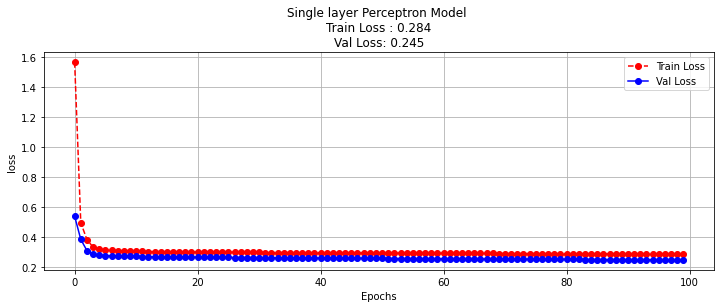

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(train_metrics_mean_row[0], '--o', color = 'red', label = 'Train Loss')
plt.plot(val_metrics_row[0], '-o', color = 'blue', label = 'Val Loss')

plt.title('Single layer Perceptron Model \nTrain Loss : {:.3f}\nVal Loss: {:.3f}'.format(train_metrics_mean_row[0][-1] , val_metrics_row[0][-1]))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()

plt.show()


In [73]:
print(weight)

[[-0.07234213]
 [ 0.04130417]
 [ 0.53882082]
 [ 0.24624248]
 [-0.01534536]
 [ 0.06397927]
 [ 0.09263768]
 [-0.01207992]]


In [74]:
print(bias )

[0.02469304]
